### EDA U.A Secondary School
#### By UNNI KRISHNAN AMBADY (SXXXX664B)


In [ ]:
print ("welcome to EDA of U A Secondary School \nThis program is to showcase the Schools Student Development Support System")

welcome to EDA of U A Secondary School 
This program is to showcase the Schools Student Development Support System


###Input Database

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")

In [ ]:
#import sqlite3

# Assume the datafile is kept in ./data/ folder
# Given SQLite database file
db_file = 'data/score.db'

try:
    # Create a connection to the SQLite database
    cnx = sqlite3.connect(db_file)
    # On first try all code except the line below is tested
    # From that, For sure we decided that there is only one table named score in this database
    df = pd.read_sql_query("SELECT * FROM score;", cnx)
    #df = pd.read_sql_query("SELECT * FROM score;", cnx)
    # Create a cursor object to execute SQL commands
    cursor = cnx.cursor()

    # Execute a SQL query to retrieve the table names from sqlite_master
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch all the table names and print them
    table_names = cursor.fetchall()

    print("Table names in the database:")
    for name in table_names:
        print(name[0])  # The table name is in the first column

except sqlite3.Error as e:
    print("SQLite error:", e)

finally:
    # Close the cursor and the database connection
    if cnx:
        cnx.close()

Table names in the database:
score


### Now there is only one table named 'score' in the database


In [ ]:
df.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [ ]:
#ONly once this code is to be run
#csv_file = 'data//score.csv'
#df.to_csv(csv_file, index=False)

In [ ]:
column_headers = df.columns.tolist()
print("Column headers in the DataFrame:")
for header in column_headers:
  print(header)

Column headers in the DataFrame:
index
number_of_siblings
direct_admission
CCA
learning_style
student_id
gender
tuition
final_test
n_male
n_female
age
hours_per_week
attendance_rate
sleep_time
wake_time
mode_of_transport
bag_color


###Data Cleaning

In [ ]:
'''
# Display the size of the DataFrame before cleaning
print("Size before cleaning:", df.shape)

# Define conditions to filter out rows with invalid data
conditions = [
    # Remove rows with any missing values (NaN)
    df.isnull().any(axis=1),

    # Remove rows where 'direct_admission' is 'NO data entered'
    df['direct_admission'] == 'NO data entered',

    # Remove rows where 'final_test' is negative
    df['final_test'] < 0,

    # Add more conditions for other columns as needed
]

# Combine the conditions using the logical OR operator to identify rows with invalid data
invalid_data_mask = np.logical_or.reduce(conditions)

# Filter the DataFrame to keep only rows without invalid data
cleaned_df = df[~invalid_data_mask]

# Display the size of the DataFrame after cleaning
print("Size after cleaning:", cleaned_df.shape)

# Now 'cleaned_df' contains only rows without invalid data
'''

Size before cleaning: (15900, 18)
Size after cleaning: (14648, 18)


In [ ]:
# Display the size of the original DataFrame before cleaning
print("Size before cleaning:", df.shape)

# Define conditions to filter out rows with invalid data
conditions = [
    # Remove rows with any missing values (NaN)
    df.isnull().any(axis=1),

    # Remove rows where 'direct_admission' is 'NO data entered'
    df['direct_admission'] == 'NO data entered',

    # Remove rows where 'final_test' is negative
    df['final_test'] < 0,

    # Add more conditions for other columns as needed
]

# Combine the conditions using the logical OR operator to identify rows with invalid data
invalid_data_mask = np.logical_or.reduce(conditions)

# Create 'df_invalid' to store the removed invalid rows
df_invalid = df[invalid_data_mask]

# Filter the original DataFrame to keep only rows without invalid data
df = df[~invalid_data_mask]

# Display the size of the cleaned DataFrame
print("Size after cleaning:", df.shape)

# Now 'df' contains only rows without invalid data, and 'df_invalid' contains the removed invalid rows

Size before cleaning: (15900, 18)
Size after cleaning: (14648, 18)


In [ ]:
df_invalid

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
9,9,2,No,Arts,Auditory,3MOMA6,Male,Yes,60.0,13.0,9.0,16.0,16.0,NaN,22:30,6:30,private transport,green
30,30,2,No,Sports,Visual,7882P8,Male,Yes,NaN,20.0,2.0,6.0,14.0,91.0,21:00,5:00,public transport,green
51,51,1,Yes,Clubs,Visual,6RUZRP,Male,Yes,NaN,14.0,7.0,15.0,9.0,90.0,23:00,7:00,walk,white
58,58,1,No,Clubs,Visual,GF3FCX,Male,No,51.0,19.0,11.0,15.0,18.0,NaN,22:30,6:30,private transport,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,0,No,Arts,Visual,M5KIUZ,Female,Y,NaN,4.0,17.0,15.0,20.0,98.0,22:00,6:00,private transport,black
15850,15850,1,No,None,Auditory,OW0FIT,Female,No,NaN,15.0,12.0,16.0,12.0,91.0,23:00,7:00,walk,green
15854,15854,0,No,Clubs,Auditory,05OOPM,Male,Yes,60.0,19.0,2.0,15.0,10.0,NaN,21:00,5:00,public transport,red
15888,15888,0,Yes,Clubs,Auditory,SD8VXP,Female,Yes,73.0,11.0,9.0,16.0,12.0,NaN,22:30,6:30,private transport,black


In [ ]:
#This need to be done only once to cerate a Good and BAD copy of CSV files
'''
# Define the paths for the output CSV files
output_csv_path_ok = 'data//score_ok.csv'
output_csv_path_invalid = 'data//score_invalid.csv'

# Save 'df' to 'data/score_ok.csv'
df.to_csv(output_csv_path_ok, index=False)

# Save 'df_invalid' to 'data/score_invalid.csv'
df_invalid.to_csv(output_csv_path_invalid, index=False)
'''

"\n# Define the paths for the output CSV files\noutput_csv_path_ok = 'data//score_ok.csv'\noutput_csv_path_invalid = 'data//score_invalid.csv'\n\n# Save 'df' to 'data/score_ok.csv'\ndf.to_csv(output_csv_path_ok, index=False)\n\n# Save 'df_invalid' to 'data/score_invalid.csv'\ndf_invalid.to_csv(output_csv_path_invalid, index=False)\n"

### The IVALID data is either Final_test marks missing
### or Attendance information is missing
### we have no choice but to eleiminate these records
### as this may lead to computational errors if it is kept in the data

In [ ]:
df.tail()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow
15899,15899,2,Yes,None,Visual,D9OKLV,Male,No,87.0,11.0,7.0,16.0,9.0,91.0,23:00,7:00,walk,yellow


In [ ]:
# Create a copy of 'df' to work with in 'df2'
df2 = df.copy()
# Convert 'sleep_time' and 'wake_time' to integers



df2['sleep_time'] = df2['sleep_time'].str.split(':').str[0].astype(int)+df2['sleep_time'].str.split(':').str[1].astype(int)/60
df2['wake_time'] = df2['wake_time'].str.split(':').str[0].astype(int)+df2['wake_time'].str.split(':').str[1].astype(int)/60

print(df2['sleep_time'][0],df2['wake_time'][0] )


# Define a function to calculate sleep duration based on the 24-hour clock
def calculate_sleep_duration(row):
  if row['sleep_time'] >= 12:
    s1 = 24 - row['sleep_time']
    return s1 + row['wake_time']
  else:
    return row['wake_time'] - row['sleep_time']

# Apply the function to create the 'sleep_duration' column in 'df2'
df2['sleep_duration'] = df2.apply(calculate_sleep_duration, axis=1)

# Display the updated 'df2' DataFrame
df2.head()






22.0 6.0


,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color,sleep_duration
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22.0,6.0,private transport,yellow,8.0
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22.5,6.5,private transport,green,8.0
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22.5,6.5,private transport,white,8.0
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21.5,5.5,public transport,yellow,8.0
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22.5,6.5,private transport,red,8.0


## Plots

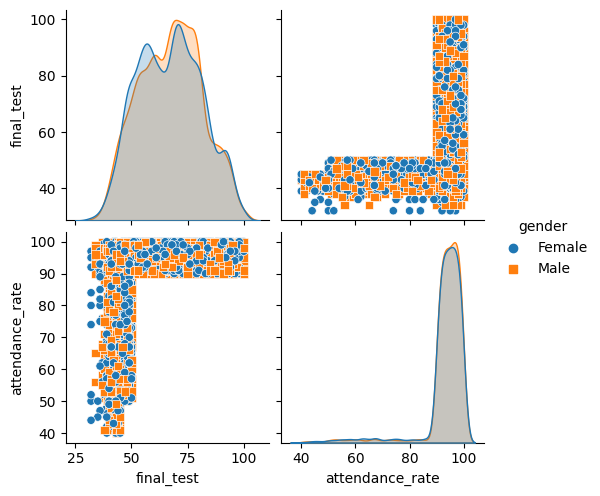

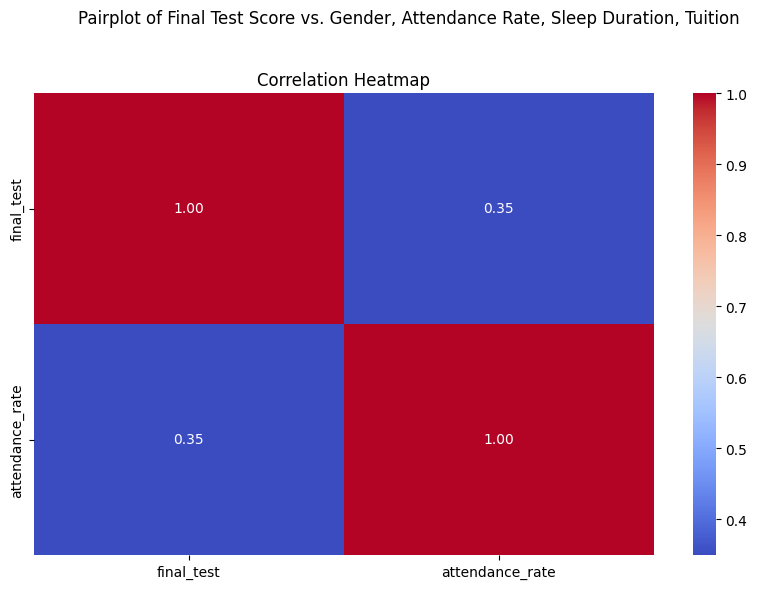

In [ ]:
## Correlation plots SET-1

# Select the columns of relevence from  DataFrame
columns_of_interest = ['final_test', 'gender', 'attendance_rate',  'tuition']
data_of_interest = df[columns_of_interest]

# Create a pairplot to visualize pairwise relationships
sns.pairplot(data_of_interest, diag_kind='kde', hue='gender', markers=['o', 's'])

# Create a correlation matrix
correlation_matrix = data_of_interest.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot titles
pairplot_title = 'Pairplot of Final Test Score vs. Gender, Attendance Rate, Sleep Duration, Tuition'
heatmap_title = 'Correlation Heatmap'

plt.suptitle(pairplot_title, y=1.02)
plt.title(heatmap_title)

# Show the plots
plt.show()

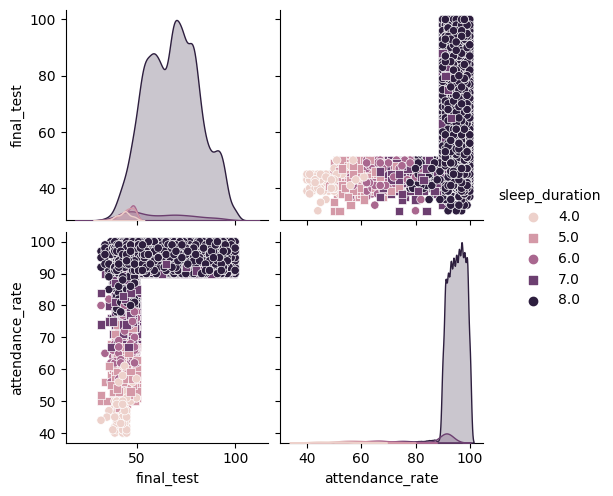

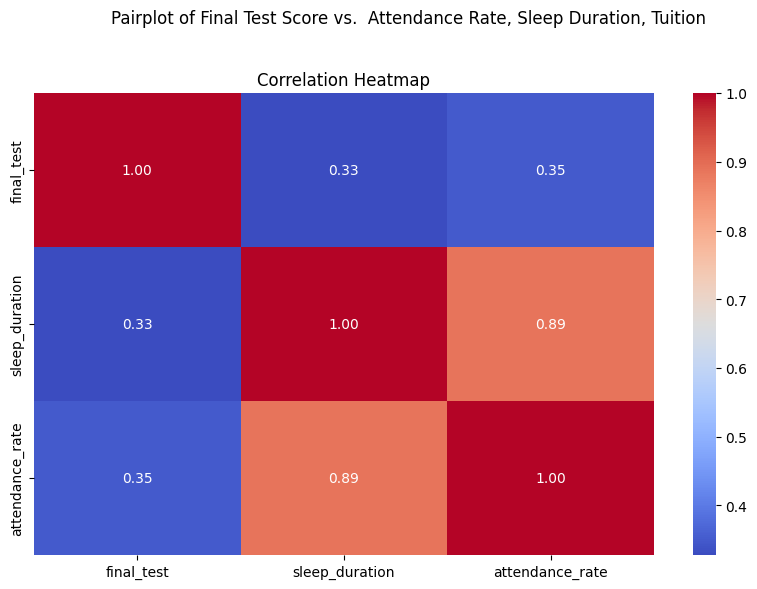

In [ ]:
## Correlation plots SET-12

# Select the columns of relevence from  DataFrame
columns_of_interest = ['final_test', 'sleep_duration', 'attendance_rate',  'tuition']
data_of_interest = df2[columns_of_interest]

# Create a pairplot to visualize pairwise relationships
sns.pairplot(data_of_interest, diag_kind='kde', hue='sleep_duration', markers=['o', 's'])

# Create a correlation matrix
correlation_matrix = data_of_interest.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot titles
pairplot_title = 'Pairplot of Final Test Score vs.  Attendance Rate, Sleep Duration, Tuition'
heatmap_title = 'Correlation Heatmap'

plt.suptitle(pairplot_title, y=1.02)
plt.title(heatmap_title)

# Show the plots
plt.show()

# Full set of Correlation

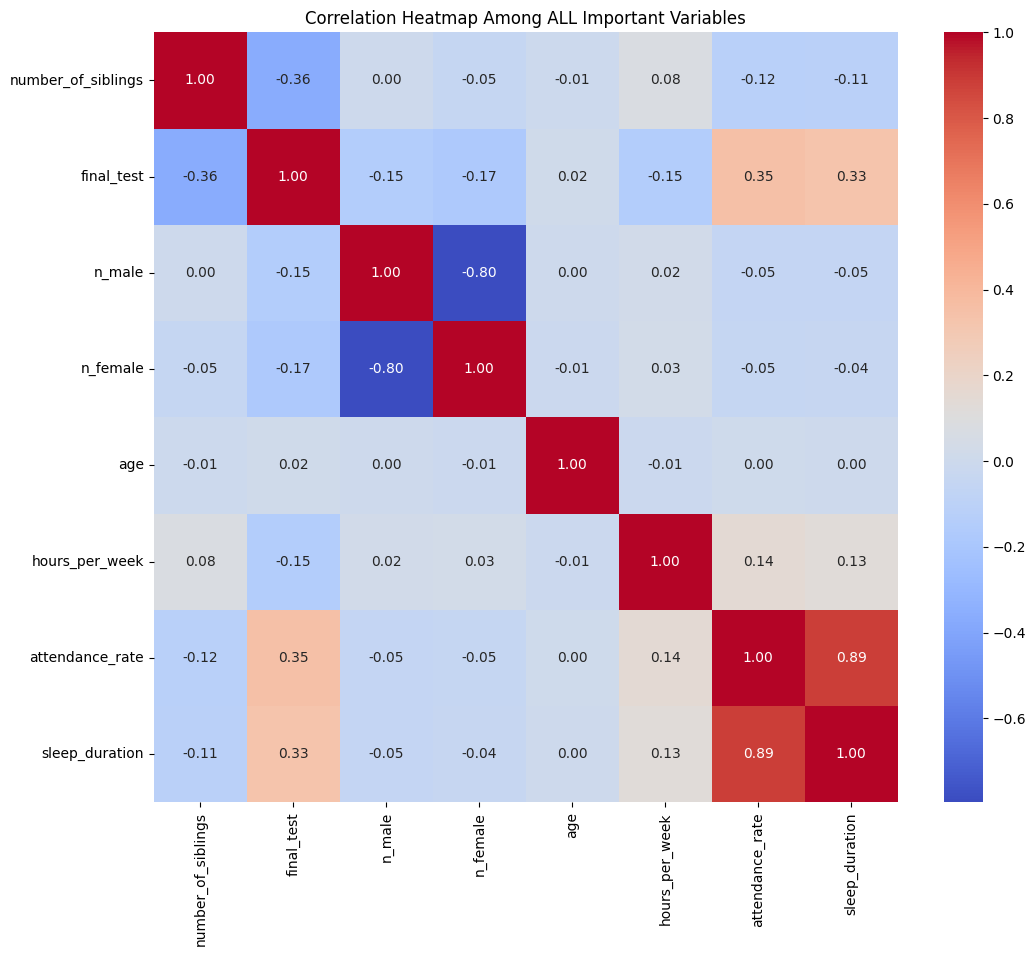

In [ ]:
# Select the columns of interest from  DataFrame
columns_of_interest = [
    'number_of_siblings', 'direct_admission', 'CCA', 'learning_style', 'student_id',
    'gender', 'tuition', 'final_test', 'n_male', 'n_female', 'age', 'hours_per_week',
    'attendance_rate', 'mode_of_transport', 'bag_color', 'sleep_duration']

data_of_interest = df2[columns_of_interest]

# Create a correlation matrix
correlation_matrix = data_of_interest.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
heatmap_title = 'Correlation Heatmap Among ALL Important Variables'

plt.title(heatmap_title)

# Show the heatmap
plt.show()

#Conclusions
## Good Sleep and good attendance are positive contributory factors in final score

### Help must be rendered to students who are:
###  (1) irregular in class and
###  (2) who report lack of sleep

### Discourage siblings to join the same school as this shows a negative impact

#End of analysis